Две недели назад банк запустил новый продукт. Руководитель отдела маркетинга попросил вас проанализировать эффективность привлечения пользователей в данный продукт. Ваша задача - сформулировать подход к анализу, построить понятную визуализацию и сделать выводы.

Инженер баз данных прислал вам выгрузку (data.xlsx файл находится в папке)

In [20]:
# Описание данных:

# Лист installs:
# install_id - уникальный ID установки;
# media_source - источник установки;
# install_date - дата установки;
# cost - стоимость данной установки;

# Лист opened_accounts:
# install_id - уникальный ID установки;
# account_id - уникальный ID аккаунта, открытого после данной устанвоки (клиент не всегда открывает аккаунт после установки);
# LTV - прогноз LTV данного аккаунта;

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#считываем данные
installs = pd.read_excel('C:/Users/Дамир/Programs/case/data.xlsx', sheet_name=0)
installs.head()

,install_id,media_source,install_date,cost
0,89704301545801,google,2021-05-10,98
1,86228215526136,google,2021-05-12,95
2,35939277698026,google,2021-05-16,107
3,59296978130969,google,2021-05-16,99
4,60864054740816,google,2021-05-16,104


In [20]:
opened_accounts = pd.read_excel('C:/Users/Дамир/Programs/case/data.xlsx', sheet_name=1)
opened_accounts.head()

,install_id,account_id,LTV
0,8.970430e+13,8.970430e+11,882.935401
1,8.622822e+13,8.622822e+11,858.935401
2,3.593928e+13,3.593928e+11,878.935401
3,5.929698e+13,5.929698e+11,875.935401
4,4.922540e+13,4.922540e+11,862.935401


In [ ]:
#теперь проверим их

In [6]:
installs.dtypes

install_id       int64
media_source    object
install_date    object
cost             int64
dtype: object

In [7]:
opened_accounts.dtypes

install_id    float64
account_id    float64
LTV           float64
dtype: object

In [24]:
print(installs.isna().sum())
print('\n\n')
print(opened_accounts.isna().sum())

install_id      0
media_source    0
install_date    0
cost            0
dtype: int64



install_id    1
account_id    1
LTV           1
dtype: int64


In [25]:
#уберем пустую строчку
opened_accounts = opened_accounts.dropna()

In [26]:
print(installs.duplicated().sum())
print(opened_accounts.duplicated().sum())

0
0


In [27]:
#Объединим данные
print(installs.shape)
print(opened_accounts.shape)


(77489, 4)
(36769, 3)


In [29]:
both = installs.merge(opened_accounts,on='install_id', how='outer')
both.head()

,install_id,media_source,install_date,cost,account_id,LTV
0,89704301545801,google,2021-05-10,98,8.970430e+11,882.935401
1,86228215526136,google,2021-05-12,95,8.622822e+11,858.935401
2,35939277698026,google,2021-05-16,107,3.593928e+11,878.935401
3,59296978130969,google,2021-05-16,99,5.929698e+11,875.935401
4,60864054740816,google,2021-05-16,104,NaN,NaN


In [30]:
#заполним нулями значения LTV для тех кто не открыл
both.LTV.fillna(0,inplace=True)

In [33]:
#обработаем дф для анализа
analysis = both.groupby(['media_source','install_date'], as_index=False).agg({'cost':'sum', 'account_id':'count', 'LTV': 'sum', 'install_id':'count'})


In [34]:
analysis = analysis.assign(revenue = analysis.LTV - analysis.cost, rate = analysis.account_id/analysis.install_id)

In [35]:
analysis.head() #revenue доход с установок, клиент клиентов, которые отрыли аккаунт)

,media_source,install_date,cost,account_id,LTV,install_id,revenue,rate
0,facebook,2021-05-10,84321,449,570249.415890,497,485928.415890,0.903421
1,facebook,2021-05-11,83226,436,552941.677791,490,469715.677791,0.889796
2,facebook,2021-05-12,91883,488,619070.630188,540,527187.630188,0.903704
3,facebook,2021-05-13,86199,461,585461.251059,507,499262.251059,0.909270
4,facebook,2021-05-14,86006,459,583398.445197,506,497392.445197,0.907115


<AxesSubplot:xlabel='install_date', ylabel='install_id'>

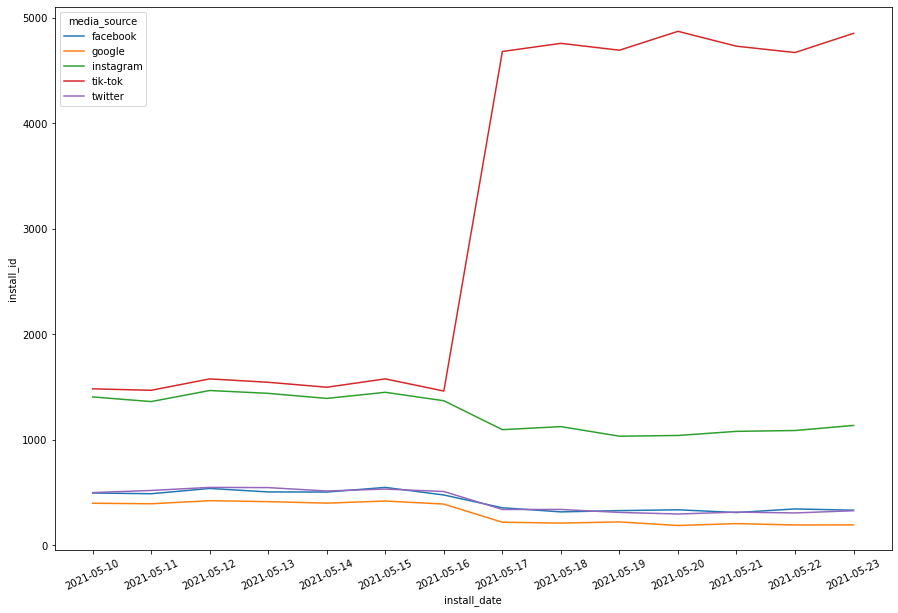

In [37]:
#посмотрим на уставки
plt.figure(figsize=(15,10))
plt.xticks(rotation=25)
sns.lineplot(data=analysis ,x='install_date',
    y='install_id', hue='media_source')

Спустя неделю, компания решила больше использовать "Тик-ток" (через остальные источники стало немного меньше)

<AxesSubplot:xlabel='install_date', ylabel='rate'>

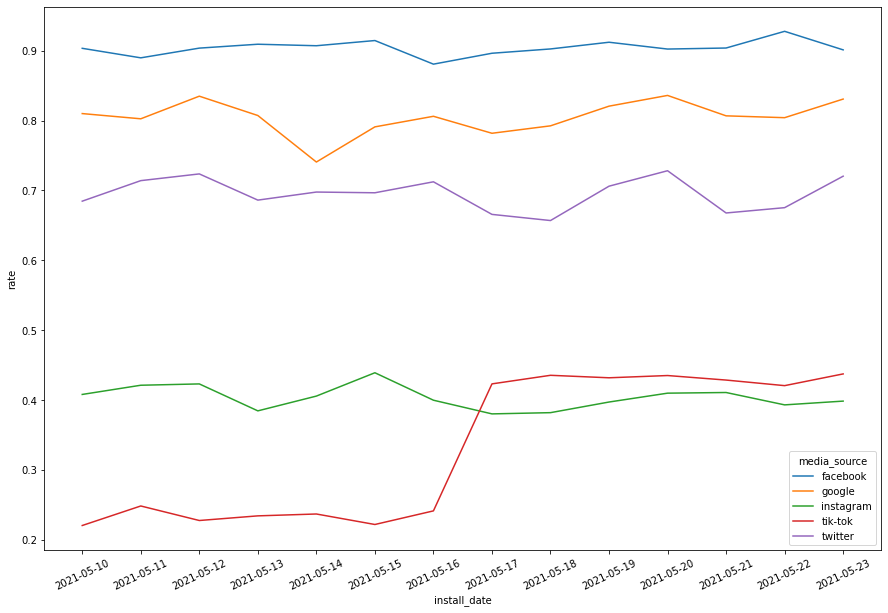

In [39]:
#посмотрим на то как из-за этого изменились доли клиентов, открывших аккаунт
plt.figure(figsize=(15,10))
plt.xticks(rotation=25)
sns.lineplot(data=analysis ,x='install_date',
    y='rate', hue='media_source')

В целом ничего кроме Тик-тока не изменилось. Однако Через Тик-Ток клиенты стали чаще открывать аккаунт после установки

<AxesSubplot:xlabel='install_date', ylabel='revenue'>

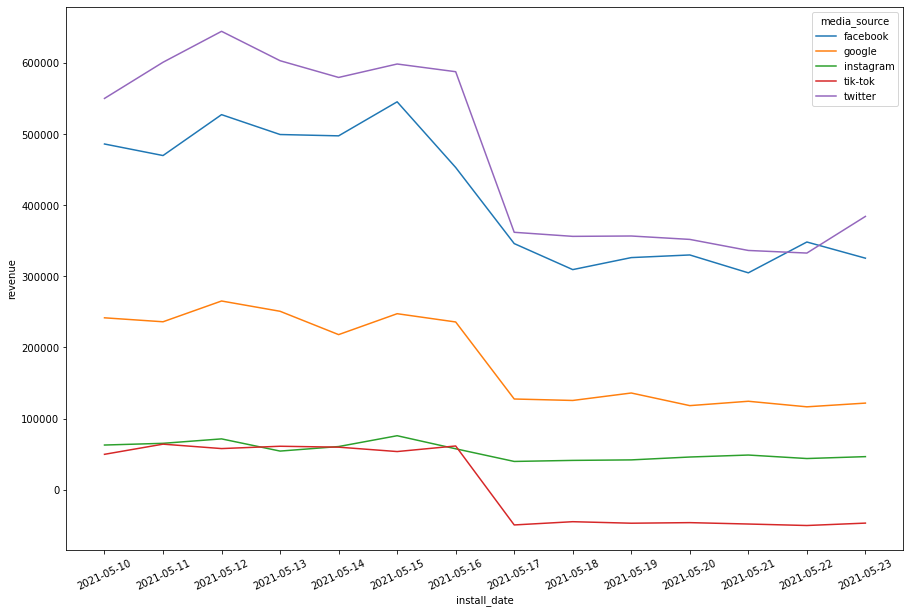

In [77]:
#одного открытия мало, посмотрим как это повляло на прибыль
plt.figure(figsize=(15,10))
plt.xticks(rotation=25)
sns.lineplot(data=analysis ,x='install_date',
    y='revenue', hue='media_source')

Как тут можно увидеть, комания сконцентрировлась на одном из самых неприбыльных направлений. 
Мало того что снижение установок, соответсвенно открытий клиентом аккаунта, на самых прибыльных площадках 
привело к колосальному снижению прибыли, так и увеличение установок Тик-Тока сделало его нерентабельным

In [50]:
#посмотрим поподробнее на изменения Тик-Тока
tik_tok = both.query('install_date>"2021-05-15" & install_date<"2021-05-18" & media_source == "tik-tok"')

In [51]:
tik_tok.groupby('install_date').agg({'cost': 'mean','LTV': 'mean', 'account_id' : 'count', 'install_id' : 'count'})

,cost,LTV,account_id,install_id
install_date,,,,
2021-05-16,49.920711,91.959679,353,1463
2021-05-17,49.869017,39.295513,1980,4680


Из таблицы видно, что большее число установок значительно увеличило число открытий аккаунта, 
но в то же время LTV упла более чем в 2 раза, что и отразилось на прибыли.

In [72]:
#посмотрим во всех группах
all_groups = both.query('install_date>"2021-05-15" & install_date<"2021-05-18"')

In [73]:
all_groups.groupby(['install_date','media_source']).agg({'cost': 'mean','LTV': 'mean', 'account_id' : 'count', 'install_id' : 'count'})\
.unstack(level=0)

cost                      LTV              account_id  \
install_date  2021-05-16  2021-05-17   2021-05-16   2021-05-17 2021-05-16   
media_source                                                                
facebook      170.079498  169.291317  1117.646723  1138.380778        421   
google         99.293367  100.427273   700.799966   680.094950        316   
instagram      69.787746   70.172288   111.770772   106.426252        548   
tik-tok        49.920711   49.869017    91.959679    39.295513        353   
twitter       210.262231  209.917889  1360.037211  1271.016583        364   

                        install_id             
install_date 2021-05-17 2021-05-16 2021-05-17  
media_source                                   
facebook            320        478        357  
google              172        392        220  
instagram           417       1371       1097  
tik-tok            1980       1463       4680  
twitter             227        511        341

Из таблицы видно, что в остальных группах таких скачков нет. 
Стоимость уставки осталась таже, LTV значимо изменился только у tik-tok.
Также видно снижение установок и открытий по всем, кроме tik-tok

### ВЫВОД

В целом говоря об эффективности привлечения пользователей в продукт, можно сказать, что оно прибыльное (т.е эффективное). 
Однако некорые решения были неудачными. Лушим решением на данный момент будет ориентация на Twitter Facebook и Google,
как самые эффективные направления. Также важно находить некий баланс менжду увеличением %открытых аккаунтов и значением LTV